# [Straw Hats] Analysis of Climate Impact on Food Prices in Metro Manila #

Member Contribution:
* Cajandab, Alleenna B.
* Cumabig, Mark Luigi M.
* Juanes, John Joven D. - Data commentary on LR model
* Libiran, Kyle David G. - Data Preprocessing, Linear Regression Model, Sensitivity Analysis
* Sanceda, Ieiaiel G. - Summary Proposal, Sensitivity Analysis



## Summary Proposal ##

Food is an essential part of a person's survival. With the worsening climate, we would like to know how certain climate variables affect food prices in Metro Manila. Analyzing the effects of the climate on food prices could allow households to better plan out their budget and make more well-informed decisions for the future.

## Methods ##

We will be using the following datasets:
* [Food Prices in Metro Manila](https://data.humdata.org/dataset/wfp-food-prices-for-philippines)
* Climate Data in Metro Manila - Meteostat Python Library

We will be doing the following:
* Linear Regression
* Sensitivity Analysis

### Data Preprocessing ###

In [ ]:
!pip install meteostat
#import libraries
import pandas as pd
import numpy as np

#import the dataset
df = pd.read_csv('https://raw.githubusercontent.com/kdlibiran/cs138/main/wfp_food_prices_phl.csv')


#Align the Date column with the date format of the other dataset
df['date'] = df['date'].astype('datetime64[ns]')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df.drop(['date'], axis=1, inplace=True)
df['time'] = (df['year'].astype(str) + '-' + df['month'].astype(str) + '-1').astype('datetime64[ns]')
df.drop(['year', 'month'], axis=1, inplace=True)

#Drop all the null values and the rows with price == 0
df.dropna(inplace= True)
df.drop(df.loc[df['price']==0].index, inplace=True)

#Drop the unnecessary rows from the dataset
df.drop(df.loc[df['market']!='Metro Manila'].index, inplace=True)
df.drop(df.loc[df['pricetype']!='Retail'].index, inplace=True)

#Drop the unnecessary columns from the dataset
df = df.drop(['admin1','admin2','market','longitude','latitude','priceflag', 'pricetype', 'currency', 'unit'
        ,'usdprice'], axis='columns')

df = pd.get_dummies(data=df)


# Import Meteostat library and dependencies
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Monthly

# Set time period
start = datetime(2000, 1, 1)
end = datetime(2023, 12, 31)

# Create Point for Manila
location = Point(14.6091, 121.0223)

# Get daily data for 2023
data = Monthly(location, start, end)
data = data.fetch()

newdf = df.merge(data, left_on='time', right_on='time')


#Drop the unnecessary columns from the dataset
newdf = newdf.drop(['time','wspd','tsun'], axis='columns')

#Drop rows with null values
newdf.dropna(inplace= True)

newdf.head()


,price,category_cereals and tubers,"category_meat, fish and eggs",category_miscellaneous food,category_oil and fats,category_pulses and nuts,category_vegetables and fruits,commodity_Anchovies,commodity_Bananas (lakatan),commodity_Bananas (latundan),...,commodity_Sweet Potato leaves,commodity_Sweet potatoes,commodity_Taro,commodity_Tomatoes,commodity_Water spinach,tavg,tmin,tmax,prcp,pres
0,15.00,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,24.9,21.3,30.8,17.0,1015.2
1,20.00,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,24.9,21.3,30.8,17.0,1015.2
2,18.00,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,24.9,21.3,30.8,17.0,1015.2
3,105.37,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,24.9,21.3,30.8,17.0,1015.2
4,15.75,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,26.9,22.3,31.3,39.0,1011.4


### Linear Regression ###

In [ ]:
#Divide the data into test and training sets
X = newdf.drop(['price'], axis='columns')
y = newdf['price'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=26)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
display(X_train)

(2436, 78)
(431, 78)
(2436,)
(431,)


,category_cereals and tubers,"category_meat, fish and eggs",category_miscellaneous food,category_oil and fats,category_pulses and nuts,category_vegetables and fruits,commodity_Anchovies,commodity_Bananas (lakatan),commodity_Bananas (latundan),commodity_Bananas (saba),...,commodity_Sweet Potato leaves,commodity_Sweet potatoes,commodity_Taro,commodity_Tomatoes,commodity_Water spinach,tavg,tmin,tmax,prcp,pres
2802,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,28.5,24.9,32.4,156.9,1009.5
2429,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,28.0,25.2,30.8,824.0,1007.0
312,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,27.5,24.3,30.2,663.0,1008.3
417,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,27.4,22.3,32.7,40.0,1009.9
1837,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,30.3,25.6,34.8,0.0,1010.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2701,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,27.1,23.1,31.5,18.1,1012.4
2172,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,26.4,23.2,29.5,180.0,1010.9
2514,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,28.2,25.0,31.4,400.0,1008.7
2058,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,27.3,24.9,31.0,433.0,1007.1


In [ ]:
#Train the model using the training set
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train.values, y_train)


#Use the model on the testing set
test_predictions = model.predict(X_test.values)

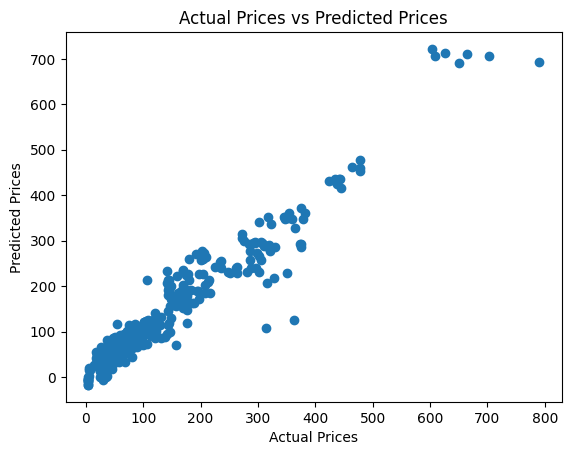

In [ ]:
# graph the predictions vs the actual values
plt.scatter(y_test, test_predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

In [ ]:
#get the MAE,MSE,RMSE, and R2 values to evaluate the model
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test,test_predictions)

comparison_df = pd.DataFrame({"Actual":y_test,"Predicted":test_predictions})
display(comparison_df)

print(f"MAE = {MAE}\nMSE = {MSE}\nRMSE = {RMSE}\nr2 = {r2}")

,Actual,Predicted
0,69.03,84.461048
1,27.43,34.803604
2,650.39,690.295147
3,120.87,100.371929
4,43.16,53.791573
...,...,...
426,32.79,38.958488
427,46.42,71.073788
428,104.53,123.101215
429,18.76,38.361145


MAE = 21.699282109731865
MSE = 1096.3224827643865
RMSE = 33.11076083034617
r2 = 0.9325337200789894


The linear model that we have has the following metrics:

* MAE = 21.699326080534682
* MSE = 1096.32543396244
* RMSE = 33.11080539585892
* r2 = 0.932533538466045

Having an MAE of around 21.70 means that the model deviated from the actual prices by around 21.70 pesos.

While the RMSE suggests that the model predicted a deviation of around 33.11 pesos from the actual prices.

We can use the MSE of 1096.33 to compare it to another model's performance.

With the r2 of 93.25% we can see that the model is a good fit for the data.

## Sensitivity Analysis ##

In [ ]:
test_base1 = X_test.iloc[21] # carrots
test_base2 = X_test.iloc[101] # Rice (milled, superior)
test_base3 = X_test.iloc[367] # Beef

#get actual prices for the base cases
actual_base1 = y_test[21]
actual_base2 = y_test[101]
actual_base3 = y_test[367]


print(test_base1[test_base1 != 0])
print(test_base2[test_base2 != 0])
print(test_base3[test_base3 != 0])

category_vegetables and fruits       1.0
commodity_Carrots                    1.0
tavg                                28.1
tmin                                24.5
tmax                                32.1
prcp                                50.3
pres                              1010.2
Name: 2600, dtype: float64
category_cereals and tubers             1.0
commodity_Rice (milled, superior)       1.0
tavg                                   27.2
tmin                                   24.6
tmax                                   32.0
prcp                                  271.0
pres                                 1009.7
Name: 1001, dtype: float64
category_meat, fish and eggs       1.0
commodity_Meat (beef)              1.0
tavg                              28.1
tmin                              25.1
tmax                              32.0
prcp                             745.3
pres                            1007.9
Name: 3430, dtype: float64


In [ ]:
test_base1.name = 'Carrots'
test_base2.name = 'Rice (milled, superior))'
test_base3.name = 'Pork'

#combine the test bases into one dataframe
test_bases = pd.concat([test_base1,test_base2,test_base3],axis=1)
test_bases = test_bases.transpose()
#predict the prices of the test bases using the model
test_bases_predictions = model.predict(test_bases.values)

#compare the predicted prices to the actual prices
test_bases_comparison_df = pd.DataFrame({"Actual":[actual_base1,actual_base2,actual_base3],"Predicted":test_bases_predictions})
test_bases_comparison_df.index = ['Carrots','Rice (milled, superior)','Beef']
display(test_bases_comparison_df)


,Actual,Predicted
Carrots,98.58,85.910755
"Rice (milled, superior)",35.00,32.574875
Beef,444.02,416.827309


### Temperature ###

In [ ]:
# Test how changes in temperature affect prices
test_temp = np.zeros(shape=(11,3))
for j in range(3):
  test_temp[0][j] = test_bases_predictions[j]
  test_base = test_bases.iloc[j]
  print('Predicted Prices as Temperature Increases' + ' (' + test_base.name + ')')
  for i in range(1, 11):
    test_temp_plus = test_base.copy()
    test_temp_plus['tavg'] = test_temp_plus['tavg'] + i
    test_temp_plus['tmin'] = test_temp_plus['tmin'] + i
    test_temp_plus['tmax'] = test_temp_plus['tmax'] + i
    test_temp_plus = test_temp_plus.values.reshape(-1, 1)
    test_temp_plus = test_temp_plus.reshape(1, -1)
    test_temp_out = model.predict(test_temp_plus)
    print("Temperature +", i,": ", test_temp_out)
    test_temp[i][j] = test_temp_out

import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=3, subplot_titles=('Carrots', 'Rice (milled, superior)', 'Beef'))

fig.add_trace(go.Scatter(x=np.arange(0,11), y=test_temp[:,0], mode='lines+markers', name='Carrots'), row=1, col=1)
fig.add_trace(go.Scatter(x=np.arange(0,11), y=test_temp[:,1], mode='lines+markers', name='Rice (milled, superior)'), row=1, col=2)
fig.add_trace(go.Scatter(x=np.arange(0,11), y=test_temp[:,2], mode='lines+markers', name='Beef'), row=1, col=3)

fig.update_layout(height=600, width=1000, title_text="Predicted Prices as Temperature Increases")
fig.show()



Predicted Prices as Temperature Increases (Carrots)
Temperature + 1 :  [93.32868576]
Temperature + 2 :  [100.74661636]
Temperature + 3 :  [108.16455078]
Temperature + 4 :  [115.58248138]
Temperature + 5 :  [123.00041199]
Temperature + 6 :  [130.41834259]
Temperature + 7 :  [137.83627701]
Temperature + 8 :  [145.25420761]
Temperature + 9 :  [152.67213821]
Temperature + 10 :  [160.09006882]
Predicted Prices as Temperature Increases (Rice (milled, superior)))
Temperature + 1 :  [39.99280548]
Temperature + 2 :  [47.4107399]
Temperature + 3 :  [54.8286705]
Temperature + 4 :  [62.2466011]
Temperature + 5 :  [69.66453171]
Temperature + 6 :  [77.08246613]
Temperature + 7 :  [84.50039673]
Temperature + 8 :  [91.91832733]
Temperature + 9 :  [99.33625793]
Temperature + 10 :  [106.75419235]
Predicted Prices as Temperature Increases (Pork)
Temperature + 1 :  [424.24523544]
Temperature + 2 :  [431.66316986]
Temperature + 3 :  [439.08110046]
Temperature + 4 :  [446.49903488]
Temperature + 5 :  [453.9

There is a visible trend among the 3 different kinds of food, which is the price increases by approximately 7.4 pesos as the temperature increases by 1 degree celsius.

### Precipitation ###

In [ ]:
# Test how changes in precipitation affect pricestest_temp = np.zeros(shape=(11,3))
test_prcp = np.zeros(shape=(11,3))

for j in range(3):
  test_prcp[0][j] = test_bases_predictions[j]
  test_base = test_bases.iloc[j]
  print('Predicted Prices as Precipitation Increases' + ' (' + test_base.name + ')')
  for i in range(1, 11):
    test_prcp_plus = test_base.copy()
    test_prcp_plus['prcp'] = test_prcp_plus['prcp'] + i
    test_prcp_plus = test_prcp_plus.values.reshape(-1, 1)
    test_prcp_plus = test_prcp_plus.reshape(1, -1)
    test_prcp_out = model.predict(test_prcp_plus)
    print("Precipitation +", i,": ", test_prcp_out)
    test_prcp[i][j] = test_prcp_out

#create tabs for each graph
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=3, subplot_titles=('Carrots', 'Rice (milled, superior)', 'Beef'))

fig.add_trace(go.Scatter(x=np.arange(0,11), y=test_prcp[:,0], mode='lines+markers', name='Carrots'), row=1, col=1)
fig.add_trace(go.Scatter(x=np.arange(0,11), y=test_prcp[:,1], mode='lines+markers', name='Rice (milled, superior)'), row=1, col=2)
fig.add_trace(go.Scatter(x=np.arange(0,11), y=test_prcp[:,2], mode='lines+markers', name='Beef'), row=1, col=3)

fig.update_layout(height=600, width=1000, title_text="Predicted Prices as Precipitation Increases")
fig.show()


Predicted Prices as Precipitation Increases (Carrots)
Precipitation + 1 :  [85.90465164]
Precipitation + 2 :  [85.89854813]
Precipitation + 3 :  [85.89244461]
Precipitation + 4 :  [85.88634109]
Precipitation + 5 :  [85.88023758]
Precipitation + 6 :  [85.87413406]
Precipitation + 7 :  [85.86803055]
Precipitation + 8 :  [85.86192703]
Precipitation + 9 :  [85.85582352]
Precipitation + 10 :  [85.84972]
Predicted Prices as Precipitation Increases (Rice (milled, superior)))
Precipitation + 1 :  [32.56877136]
Precipitation + 2 :  [32.56266785]
Precipitation + 3 :  [32.55656433]
Precipitation + 4 :  [32.55046082]
Precipitation + 5 :  [32.5443573]
Precipitation + 6 :  [32.53825378]
Precipitation + 7 :  [32.53215027]
Precipitation + 8 :  [32.52604675]
Precipitation + 9 :  [32.51994324]
Precipitation + 10 :  [32.51383972]
Predicted Prices as Precipitation Increases (Pork)
Precipitation + 1 :  [416.82120514]
Precipitation + 2 :  [416.81510162]
Precipitation + 3 :  [416.80899811]
Precipitation + 4 

The price decrease when precipitation increases is not that significant since adding 10 mm to the precipitation only decreases the price by 0.06 pesos.

### Pressure ###

In [ ]:
# Test how changes in pressure affect prices
test_pres = np.zeros(shape=(11,3))

for j in range(3):
  test_pres[0][j] = test_bases_predictions[j]
  test_base = test_bases.iloc[j]
  print('Predicted Prices as Pressure Increases' + ' (' + test_base.name + ')')
  for i in range(1, 11):
    test_pres_plus = test_base.copy()
    test_pres_plus['pres'] = test_pres_plus['pres'] + i
    test_pres_plus = test_pres_plus.values.reshape(-1, 1)
    test_pres_plus = test_pres_plus.reshape(1, -1)
    test_pres_out = model.predict(test_pres_plus)
    print("Temperature +", i,": ", test_pres_out)
    test_pres[i][j] = test_pres_out


#create tabs for each graph
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=3, subplot_titles=('Carrots', 'Rice (milled, superior)', 'Beef'))

fig.add_trace(go.Scatter(x=np.arange(0,11), y=test_pres[:,0], mode='lines+markers', name='Carrots'), row=1, col=1)
fig.add_trace(go.Scatter(x=np.arange(0,11), y=test_pres[:,1], mode='lines+markers', name='Rice (milled, superior)'), row=1, col=2)
fig.add_trace(go.Scatter(x=np.arange(0,11), y=test_pres[:,2], mode='lines+markers', name='Beef'), row=1, col=3)

fig.update_layout(height=600, width=1000, title_text="Predicted Prices as Pressure Increases")
fig.show()



Predicted Prices as Pressure Increases (Carrots)
Temperature + 1 :  [93.84674072]
Temperature + 2 :  [101.78272629]
Temperature + 3 :  [109.71871185]
Temperature + 4 :  [117.65469742]
Temperature + 5 :  [125.59068298]
Temperature + 6 :  [133.52666855]
Temperature + 7 :  [141.46265411]
Temperature + 8 :  [149.39863968]
Temperature + 9 :  [157.33462524]
Temperature + 10 :  [165.27061081]
Predicted Prices as Pressure Increases (Rice (milled, superior)))
Temperature + 1 :  [40.51086044]
Temperature + 2 :  [48.44684601]
Temperature + 3 :  [56.38283157]
Temperature + 4 :  [64.31881714]
Temperature + 5 :  [72.2548027]
Temperature + 6 :  [80.19078827]
Temperature + 7 :  [88.12677383]
Temperature + 8 :  [96.0627594]
Temperature + 9 :  [103.99874496]
Temperature + 10 :  [111.93473053]
Predicted Prices as Pressure Increases (Pork)
Temperature + 1 :  [424.76329422]
Temperature + 2 :  [432.69927979]
Temperature + 3 :  [440.63526535]
Temperature + 4 :  [448.57125092]
Temperature + 5 :  [456.50723648

The price increases by approximately 8 pesos as the pressure increases by 1 hPA.

### Temperature + Precipitation ###

In [ ]:
# Test how increases in both temperature and precipitation affect prices
test_temp_prcp = np.zeros(shape=(11,3))

for j in range(3):
  test_temp_prcp[0][j] = test_bases_predictions[j]
  test_base = test_bases.iloc[j]
  print('Predicted Prices as Temperature & Precipitation Increases' + ' (' + test_base.name + ')')
  for i in range(1, 11):
    test_temp_prcp_plus = test_base.copy()
    test_temp_prcp_plus['tavg'] = test_temp_prcp_plus['tavg'] + i
    test_temp_prcp_plus['tmin'] = test_temp_prcp_plus['tmin'] + i
    test_temp_prcp_plus['tmax'] = test_temp_prcp_plus['tmax'] + i
    test_temp_prcp_plus['prcp'] = test_temp_prcp_plus['prcp'] + i
    test_temp_prcp_plus = test_temp_prcp_plus.values.reshape(-1, 1)
    test_temp_prcp_plus = test_temp_prcp_plus.reshape(1, -1)
    test_temp_prcp_out = model.predict(test_temp_prcp_plus)
    print("Temperature & Precipitation +", i,": ", test_temp_prcp_out)
    test_temp_prcp[i][j] = test_temp_prcp_out



Predicted Prices as Temperature & Precipitation Increases (Carrots)
Temperature & Precipitation + 1 :  [93.32258224]
Temperature & Precipitation + 2 :  [100.73440933]
Temperature & Precipitation + 3 :  [108.14624023]
Temperature & Precipitation + 4 :  [115.55806732]
Temperature & Precipitation + 5 :  [122.96989441]
Temperature & Precipitation + 6 :  [130.3817215]
Temperature & Precipitation + 7 :  [137.7935524]
Temperature & Precipitation + 8 :  [145.20537949]
Temperature & Precipitation + 9 :  [152.61720657]
Temperature & Precipitation + 10 :  [160.02903366]
Predicted Prices as Temperature & Precipitation Increases (Rice (milled, superior)))
Temperature & Precipitation + 1 :  [39.98670197]
Temperature & Precipitation + 2 :  [47.39853287]
Temperature & Precipitation + 3 :  [54.81035995]
Temperature & Precipitation + 4 :  [62.22218704]
Temperature & Precipitation + 5 :  [69.63401413]
Temperature & Precipitation + 6 :  [77.04584503]
Temperature & Precipitation + 7 :  [84.45767212]
Temper

In [ ]:
# Test how increases in temperature and decreases in precipitation affect prices
test_temp_prcp = np.zeros(shape=(11,3))

for j in range(3):
  test_temp_prcp[0][j] = test_bases_predictions[j]
  test_base = test_bases.iloc[j]
  print('Predicted Prices as Temperature Increases & Precipitation Decreases' + ' (' + test_base.name + ')')
  for i in range(1, 11):
    test_temp_prcp_plus = test_base.copy()
    test_temp_prcp_plus['tavg'] = test_temp_prcp_plus['tavg'] + i
    test_temp_prcp_plus['tmin'] = test_temp_prcp_plus['tmin'] + i
    test_temp_prcp_plus['tmax'] = test_temp_prcp_plus['tmax'] + i
    test_temp_prcp_plus['prcp'] = test_temp_prcp_plus['prcp'] - i
    test_temp_prcp_plus = test_temp_prcp_plus.values.reshape(-1, 1)
    test_temp_prcp_plus = test_temp_prcp_plus.reshape(1, -1)
    test_temp_prcp_out = model.predict(test_temp_prcp_plus)
    print("Temperature +", i, "& Precipitation -", i,": ", test_temp_prcp_out)
    test_temp_prcp[i][j] = test_temp_prcp_out

Predicted Prices as Temperature Increases & Precipitation Decreases (Carrots)
Temperature + 1 & Precipitation - 1 :  [93.33478928]
Temperature + 2 & Precipitation - 2 :  [100.75882339]
Temperature + 3 & Precipitation - 3 :  [108.18286133]
Temperature + 4 & Precipitation - 4 :  [115.60689545]
Temperature + 5 & Precipitation - 5 :  [123.03092957]
Temperature + 6 & Precipitation - 6 :  [130.45496368]
Temperature + 7 & Precipitation - 7 :  [137.87900162]
Temperature + 8 & Precipitation - 8 :  [145.30303574]
Temperature + 9 & Precipitation - 9 :  [152.72706985]
Temperature + 10 & Precipitation - 10 :  [160.15110397]
Predicted Prices as Temperature Increases & Precipitation Decreases (Rice (milled, superior)))
Temperature + 1 & Precipitation - 1 :  [39.998909]
Temperature + 2 & Precipitation - 2 :  [47.42294693]
Temperature + 3 & Precipitation - 3 :  [54.84698105]
Temperature + 4 & Precipitation - 4 :  [62.27101517]
Temperature + 5 & Precipitation - 5 :  [69.69504929]
Temperature + 6 & Preci

In [ ]:
# Test how decreases in temperature and increases in precipitation affect prices
test_temp_prcp = np.zeros(shape=(11,3))

for j in range(3):
  test_temp_prcp[0][j] = test_bases_predictions[j]
  test_base = test_bases.iloc[j]
  print('Predicted Prices as Temperature Decreases & Precipitation Increases' + ' (' + test_base.name + ')')
  for i in range(1, 11):
    test_temp_prcp_plus = test_base.copy()
    test_temp_prcp_plus['tavg'] = test_temp_prcp_plus['tavg'] - i
    test_temp_prcp_plus['tmin'] = test_temp_prcp_plus['tmin'] - i
    test_temp_prcp_plus['tmax'] = test_temp_prcp_plus['tmax'] - i
    test_temp_prcp_plus['prcp'] = test_temp_prcp_plus['prcp'] + i
    test_temp_prcp_plus = test_temp_prcp_plus.values.reshape(-1, 1)
    test_temp_prcp_plus = test_temp_prcp_plus.reshape(1, -1)
    test_temp_prcp_out = model.predict(test_temp_prcp_plus)
    print("Temperature -", i, "& Precipitation +", i,": ", test_temp_prcp_out)
    test_temp_prcp[i][j] = test_temp_prcp_out

Predicted Prices as Temperature Decreases & Precipitation Increases (Carrots)
Temperature - 1 & Precipitation + 1 :  [78.48672104]
Temperature - 2 & Precipitation + 2 :  [71.06268311]
Temperature - 3 & Precipitation + 3 :  [63.63864899]
Temperature - 4 & Precipitation + 4 :  [56.21461487]
Temperature - 5 & Precipitation + 5 :  [48.79058075]
Temperature - 6 & Precipitation + 6 :  [41.36654282]
Temperature - 7 & Precipitation + 7 :  [33.9425087]
Temperature - 8 & Precipitation + 8 :  [26.51847458]
Temperature - 9 & Precipitation + 9 :  [19.09444046]
Temperature - 10 & Precipitation + 10 :  [11.67040253]
Predicted Prices as Temperature Decreases & Precipitation Increases (Rice (milled, superior)))
Temperature - 1 & Precipitation + 1 :  [25.15084076]
Temperature - 2 & Precipitation + 2 :  [17.72680664]
Temperature - 3 & Precipitation + 3 :  [10.30276871]
Temperature - 4 & Precipitation + 4 :  [2.87873459]
Temperature - 5 & Precipitation + 5 :  [-4.54529953]
Temperature - 6 & Precipitation 

### Temperature + Pressure ###

In [ ]:
# Test how increases in both temperature and pressure affect prices
test_temp_pres = np.zeros(shape=(11,3))
for j in range(3):
  test_temp_pres[0][j] = test_bases_predictions[j]
  test_base = test_bases.iloc[j]
  print('Predicted Prices as Temperature & Pressure Increases' + ' (' + test_base.name + ')')
  for i in range(1, 11):
    test_temp_pres_plus = test_base.copy()
    test_temp_pres_plus['tavg'] = test_temp_pres_plus['tavg'] + i
    test_temp_pres_plus['tmin'] = test_temp_pres_plus['tmin'] + i
    test_temp_pres_plus['tmax'] = test_temp_pres_plus['tmax'] + i
    test_temp_pres_plus['pres'] = test_temp_pres_plus['pres'] + i
    test_temp_pres_plus = test_temp_pres_plus.values.reshape(-1, 1)
    test_temp_pres_plus = test_temp_pres_plus.reshape(1, -1)
    test_temp_pres_out = model.predict(test_temp_pres_plus)
    print("Temperature & Pressure +", i,": ", test_temp_pres_out)
    test_temp_pres[i][j] = test_temp_pres_out

Predicted Prices as Temperature & Pressure Increases (Carrots)
Temperature & Pressure + 1 :  [101.26467133]
Temperature & Pressure + 2 :  [116.61858749]
Temperature & Pressure + 3 :  [131.97250748]
Temperature & Pressure + 4 :  [147.32642365]
Temperature & Pressure + 5 :  [162.68033981]
Temperature & Pressure + 6 :  [178.03425598]
Temperature & Pressure + 7 :  [193.38817596]
Temperature & Pressure + 8 :  [208.74209213]
Temperature & Pressure + 9 :  [224.0960083]
Temperature & Pressure + 10 :  [239.44992447]
Predicted Prices as Temperature & Pressure Increases (Rice (milled, superior)))
Temperature & Pressure + 1 :  [47.92879105]
Temperature & Pressure + 2 :  [63.28271103]
Temperature & Pressure + 3 :  [78.6366272]
Temperature & Pressure + 4 :  [93.99054337]
Temperature & Pressure + 5 :  [109.34445953]
Temperature & Pressure + 6 :  [124.69837952]
Temperature & Pressure + 7 :  [140.05229568]
Temperature & Pressure + 8 :  [155.40621185]
Temperature & Pressure + 9 :  [170.76012802]
Tempera

In [ ]:
# Test how increases in temperature and decreases in pressure affect prices
test_temp_pres = np.zeros(shape=(11,3))
for j in range(3):
  test_temp_pres[0][j] = test_bases_predictions[j]
  test_base = test_bases.iloc[j]
  print('Predicted Prices as Temperature Increases & Pressure Decreases' + ' (' + test_base.name + ')')
  for i in range(1, 11):
    test_temp_pres_plus = test_base.copy()
    test_temp_pres_plus['tavg'] = test_temp_pres_plus['tavg'] + i
    test_temp_pres_plus['tmin'] = test_temp_pres_plus['tmin'] + i
    test_temp_pres_plus['tmax'] = test_temp_pres_plus['tmax'] + i
    test_temp_pres_plus['pres'] = test_temp_pres_plus['pres'] - i
    test_temp_pres_plus = test_temp_pres_plus.values.reshape(-1, 1)
    test_temp_pres_plus = test_temp_pres_plus.reshape(1, -1)
    test_temp_pres_out = model.predict(test_temp_pres_plus)
    print("Temperature +", i, "& Pressure -", i,": ", test_temp_pres_out)
    test_temp_pres[i][j] = test_temp_pres_out

Predicted Prices as Temperature Increases & Pressure Decreases (Carrots)
Temperature + 1 & Pressure - 1 :  [85.3927002]
Temperature + 2 & Pressure - 2 :  [84.87464523]
Temperature + 3 & Pressure - 3 :  [84.35659409]
Temperature + 4 & Pressure - 4 :  [83.83853912]
Temperature + 5 & Pressure - 5 :  [83.32048416]
Temperature + 6 & Pressure - 6 :  [82.8024292]
Temperature + 7 & Pressure - 7 :  [82.28437805]
Temperature + 8 & Pressure - 8 :  [81.76632309]
Temperature + 9 & Pressure - 9 :  [81.24826813]
Temperature + 10 & Pressure - 10 :  [80.73021317]
Predicted Prices as Temperature Increases & Pressure Decreases (Rice (milled, superior)))
Temperature + 1 & Pressure - 1 :  [32.05681992]
Temperature + 2 & Pressure - 2 :  [31.53876877]
Temperature + 3 & Pressure - 3 :  [31.02071381]
Temperature + 4 & Pressure - 4 :  [30.50265884]
Temperature + 5 & Pressure - 5 :  [29.98460388]
Temperature + 6 & Pressure - 6 :  [29.46655273]
Temperature + 7 & Pressure - 7 :  [28.94849777]
Temperature + 8 & Pre

In [ ]:
# Test how decreases in temperature and increases in pressure affect prices
test_temp_pres = np.zeros(shape=(11,3))
for j in range(3):
  test_temp_pres[0][j] = test_bases_predictions[j]
  test_base = test_bases.iloc[j]
  print('Predicted Prices as Temperature Decreases & Pressure Increases' + ' (' + test_base.name + ')')
  for i in range(1, 11):
    test_temp_pres_plus = test_base.copy()
    test_temp_pres_plus['tavg'] = test_temp_pres_plus['tavg'] - i
    test_temp_pres_plus['tmin'] = test_temp_pres_plus['tmin'] - i
    test_temp_pres_plus['tmax'] = test_temp_pres_plus['tmax'] - i
    test_temp_pres_plus['pres'] = test_temp_pres_plus['pres'] + i
    test_temp_pres_plus = test_temp_pres_plus.values.reshape(-1, 1)
    test_temp_pres_plus = test_temp_pres_plus.reshape(1, -1)
    test_temp_pres_out = model.predict(test_temp_pres_plus)
    print("Temperature -", i, "& Pressure +", i,": ", test_temp_pres_out)
    test_temp_pres[i][j] = test_temp_pres_out

Predicted Prices as Temperature Decreases & Pressure Increases (Carrots)
Temperature - 1 & Pressure + 1 :  [86.42881012]
Temperature - 2 & Pressure + 2 :  [86.94686127]
Temperature - 3 & Pressure + 3 :  [87.46491623]
Temperature - 4 & Pressure + 4 :  [87.98297119]
Temperature - 5 & Pressure + 5 :  [88.50102615]
Temperature - 6 & Pressure + 6 :  [89.0190773]
Temperature - 7 & Pressure + 7 :  [89.53713226]
Temperature - 8 & Pressure + 8 :  [90.05518723]
Temperature - 9 & Pressure + 9 :  [90.57324219]
Temperature - 10 & Pressure + 10 :  [91.09129333]
Predicted Prices as Temperature Decreases & Pressure Increases (Rice (milled, superior)))
Temperature - 1 & Pressure + 1 :  [33.09292984]
Temperature - 2 & Pressure + 2 :  [33.6109848]
Temperature - 3 & Pressure + 3 :  [34.12903595]
Temperature - 4 & Pressure + 4 :  [34.64709091]
Temperature - 5 & Pressure + 5 :  [35.16514587]
Temperature - 6 & Pressure + 6 :  [35.68320084]
Temperature - 7 & Pressure + 7 :  [36.20125198]
Temperature - 8 & Pre

### Precipitation + Pressure ###

In [ ]:
# Test how increases in both precipitation and pressure affect prices
test_prcp_pres = np.zeros(shape=(11,3))
for j in range(3):
  test_prcp_pres[0][j] = test_bases_predictions[j]
  test_base = test_bases.iloc[j]
  print('Predicted Prices as Precipitation & Pressure Increases' + ' (' + test_base.name + ')')
  for i in range(1, 11):
    test_prcp_pres_plus = test_base.copy()
    test_prcp_pres_plus['prcp'] = test_prcp_pres_plus['prcp'] + i
    test_prcp_pres_plus['pres'] = test_prcp_pres_plus['pres'] + i
    test_prcp_pres_plus = test_prcp_pres_plus.values.reshape(-1, 1)
    test_prcp_pres_plus = test_prcp_pres_plus.reshape(1, -1)
    test_prcp_pres_out = model.predict(test_prcp_pres_plus)
    print("Precipitation & Pressure +", i,": ", test_prcp_pres_out)
    test_prcp_pres[i][j] = test_prcp_pres_out



Predicted Prices as Precipitation & Pressure Increases (Carrots)
Precipitation & Pressure + 1 :  [93.84063721]
Precipitation & Pressure + 2 :  [101.77051926]
Precipitation & Pressure + 3 :  [109.70040131]
Precipitation & Pressure + 4 :  [117.63028336]
Precipitation & Pressure + 5 :  [125.56016541]
Precipitation & Pressure + 6 :  [133.49004745]
Precipitation & Pressure + 7 :  [141.4199295]
Precipitation & Pressure + 8 :  [149.34981155]
Precipitation & Pressure + 9 :  [157.2796936]
Precipitation & Pressure + 10 :  [165.20957565]
Predicted Prices as Precipitation & Pressure Increases (Rice (milled, superior)))
Precipitation & Pressure + 1 :  [40.50475693]
Precipitation & Pressure + 2 :  [48.43463898]
Precipitation & Pressure + 3 :  [56.36452103]
Precipitation & Pressure + 4 :  [64.29440308]
Precipitation & Pressure + 5 :  [72.22428513]
Precipitation & Pressure + 6 :  [80.15416718]
Precipitation & Pressure + 7 :  [88.08404922]
Precipitation & Pressure + 8 :  [96.01393127]
Precipitation & P

In [ ]:
# Test how increases in precipitation and decreases in pressure affect prices
test_prcp_pres = np.zeros(shape=(11,3))
for j in range(3):
  test_prcp_pres[0][j] = test_bases_predictions[j]
  test_base = test_bases.iloc[j]
  print('Predicted Prices as Precipitation Increases & Pressure Decreases' + ' (' + test_base.name + ')')
  for i in range(1, 11):
    test_prcp_pres_plus = test_base.copy()
    test_prcp_pres_plus['prcp'] = test_prcp_pres_plus['prcp'] + i
    test_prcp_pres_plus['pres'] = test_prcp_pres_plus['pres'] - i
    test_prcp_pres_plus = test_prcp_pres_plus.values.reshape(-1, 1)
    test_prcp_pres_plus = test_prcp_pres_plus.reshape(1, -1)
    test_prcp_pres_out = model.predict(test_prcp_pres_plus)
    print("Precipitation +", i, "& Pressure -", i,": ", test_prcp_pres_out)
    test_prcp_pres[i][j] = test_prcp_pres_out

Predicted Prices as Precipitation Increases & Pressure Decreases (Carrots)
Precipitation + 1 & Pressure - 1 :  [77.96866608]
Precipitation + 2 & Pressure - 2 :  [70.026577]
Precipitation + 3 & Pressure - 3 :  [62.08448792]
Precipitation + 4 & Pressure - 4 :  [54.14239883]
Precipitation + 5 & Pressure - 5 :  [46.20030975]
Precipitation + 6 & Pressure - 6 :  [38.25822067]
Precipitation + 7 & Pressure - 7 :  [30.31613159]
Precipitation + 8 & Pressure - 8 :  [22.37404251]
Precipitation + 9 & Pressure - 9 :  [14.43195343]
Precipitation + 10 & Pressure - 10 :  [6.48986435]
Predicted Prices as Precipitation Increases & Pressure Decreases (Rice (milled, superior)))
Precipitation + 1 & Pressure - 1 :  [24.6327858]
Precipitation + 2 & Pressure - 2 :  [16.69069672]
Precipitation + 3 & Pressure - 3 :  [8.74860764]
Precipitation + 4 & Pressure - 4 :  [0.80651855]
Precipitation + 5 & Pressure - 5 :  [-7.13557053]
Precipitation + 6 & Pressure - 6 :  [-15.07765961]
Precipitation + 7 & Pressure - 7 :  

In [ ]:
# Test how decreases in precipitation and increases in pressure affect prices
test_prcp_pres = np.zeros(shape=(11,3))
for j in range(3):
  test_prcp_pres[0][j] = test_bases_predictions[j]
  test_base = test_bases.iloc[j]
  print('Predicted Prices as Precipitation Decreases & Pressure Increases' + ' (' + test_base.name + ')')
  for i in range(1, 11):
    test_prcp_pres_plus = test_base.copy()
    test_prcp_pres_plus['prcp'] = test_prcp_pres_plus['prcp'] - i
    test_prcp_pres_plus['pres'] = test_prcp_pres_plus['pres'] + i
    test_prcp_pres_plus = test_prcp_pres_plus.values.reshape(-1, 1)
    test_prcp_pres_plus = test_prcp_pres_plus.reshape(1, -1)
    test_prcp_pres_out = model.predict(test_prcp_pres_plus)
    print("Precipitation -", i, "& Pressure +", i,": ", test_prcp_pres_out)
    test_prcp_pres[i][j] = test_prcp_pres_out

Predicted Prices as Precipitation Decreases & Pressure Increases (Carrots)
Precipitation - 1 & Pressure + 1 :  [93.85284424]
Precipitation - 2 & Pressure + 2 :  [101.79493332]
Precipitation - 3 & Pressure + 3 :  [109.7370224]
Precipitation - 4 & Pressure + 4 :  [117.67911148]
Precipitation - 5 & Pressure + 5 :  [125.62120056]
Precipitation - 6 & Pressure + 6 :  [133.56328964]
Precipitation - 7 & Pressure + 7 :  [141.50537872]
Precipitation - 8 & Pressure + 8 :  [149.4474678]
Precipitation - 9 & Pressure + 9 :  [157.38955688]
Precipitation - 10 & Pressure + 10 :  [165.33164597]
Predicted Prices as Precipitation Decreases & Pressure Increases (Rice (milled, superior)))
Precipitation - 1 & Pressure + 1 :  [40.51696396]
Precipitation - 2 & Pressure + 2 :  [48.45905304]
Precipitation - 3 & Pressure + 3 :  [56.40114212]
Precipitation - 4 & Pressure + 4 :  [64.3432312]
Precipitation - 5 & Pressure + 5 :  [72.28532028]
Precipitation - 6 & Pressure + 6 :  [80.22740936]
Precipitation - 7 & Press

The sensitivity analysis focuses on only 3 kinds of food which are carrots, rice and beef and 3 weather variables which are temperature, pressure, and precipitation. As seen in the prices and graphs above, the temperature and the prices of all 3 food are directly proportional, and with every increase of temperature, the price also increases. This is also the case for pressure which is also directly proportional to food prices. Precipitation and price appears to be inversely proportional, however, the price change is not that significant compared to the price changes when temperature and pressure are increased. While both pressure and temperature have a greater impact on the food prices compared to precipitation, pressure affects the price slightly more than temperature. We also tried multiple pairs of increases and decreases in climate variables which only lead to the sum of increases or decreases in price (± 7.4 for temperature, ± 8 for pressure and, ± 0.006 for precipitation).